# 2 Data wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Objectives](#2.4_Objectives)
  * [2.5 Load The ECG Data](#ECG_Data)
  * [2.6 Explore The Data](#2.6_Explore_The_Data)
    * [2.6.1 Number of Missing Values](#2.6.1_Number_Of_Missing_Values)
    * [2.6.2 Number of Duplicate Rows](#2.6.2_Number_Of_Duplicate_Rows)
    * [2.6.3 Number of distinct values in each columns](#2.6.3_Number_of_distinct)
      * [2.6.3.1 Unique Resort Names](#2.6.3.1_Unique_Resort_Names)
      * [2.6.3.2 Region And State](#2.6.3.2_Region_And_State)
      * [2.6.3.3 Number of distinct values in each columns](#2.6.3_Number_of_distinct)
    * [2.6.4 Numeric Features](#2.6.4_Numeric_Features)
      * [2.6.4.1 Numeric data summary](#2.6.4.1_Numeric_data_summary)
      * [2.6.4.2 Distributions Of Feature Values](#2.6.4.2_Distributions_Of_Feature_Values)
  * [2.7 Target Feature](#2.7_Target_Feature)
  * [2.8 Save data](#2.8_Save_data)
  


## 2.2 Introduction<a id='2.2_Introduction'></a>

This step focuses on collecting data, organizing it, and making sure it's well defined. 

## 2.3 Imports<a id='2.3_Imports'></a>

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from library.sb_utils import save_file


## 2.4 Objectives<a id='2.4_Objectives'></a>

There are some fundamental questions to resolve in this notebook before you move on.

* Do you think you may have the data you need to tackle the desired question?
    * Have you identified the required target value?
    * Do you have potentially useful features?
* Do you have any fundamental issues with the data?

## 2.5 Load The ECG Data<a id='ECG_Data'></a>

In [76]:
# the supplied CSV data file is the raw_data directory
ecg_data = pd.read_csv('../raw_data/ecg.csv',header=None)

Good first steps in auditing the data are the info method and displaying the first few records with head.

In [77]:
#Call the info method on ecg_data to see a summary of the data
ecg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


As the result above shows there are 4998 samples described with 140 potential features.

In [78]:
#Call the head method on ecg_data to print the first several rows of the data
ecg_data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [79]:
# rename columns
ecg_data.columns=["t"+str(i) for i in range(140)]+['Target']
ecg_data.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t131,t132,t133,t134,t135,t136,t137,t138,t139,Target
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


## 2.6 Explore The Data<a id='2.6_Explore_The_Data'></a>

### 2.6.1 Number Of Missing Values<a id='2.6.1_Missing_Values'></a> 

In [80]:
ecg_data.isnull().any().sum()

0

It's good that the dataset doesn't have any missing values.

### 2.6.2 Number of Duplicate Rows<a id='2.6.2_Duplicate_Rows'></a>

Is there any duplicated should be taken into account?

In [81]:
# the number of duplicate rows
ecg_data[ecg_data.duplicated()]

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t131,t132,t133,t134,t135,t136,t137,t138,t139,Target


 There is no duplicate rows.

#### 2.6.3 Number of distinct values in each columns<a id='2.6.3_Number_of_distinct'></a>

In [82]:
# the number of unique values in each column
ecg_data.nunique().sort_values()

Target       2
t97       4996
t5        4996
t107      4997
t94       4997
          ... 
t42       4998
t41       4998
t40       4998
t55       4998
t70       4998
Length: 141, dtype: int64

 The column Target has two discrete values.

### 2.6.4 Numeric Features<a id='2.6.4_Numeric_Features'></a>

Having decided to reserve judgement on how exactly you utilize the State, turn your attention to cleaning the numeric features.

#### 2.6.4.1 Numeric data summary<a id='2.6.4.1_Numeric_data_summary'></a>

In [83]:
ecg_data.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
t0,4998.0,-0.262502,1.152450,-6.729499,-1.004220,-0.297541,0.499909,4.966414
t1,4998.0,-1.649828,1.445542,-7.090374,-2.701936,-1.661892,-0.677998,3.479689
t2,4998.0,-2.492623,1.386457,-5.132459,-3.668585,-2.586129,-1.514187,2.660597
t3,4998.0,-3.119754,1.302921,-5.363241,-4.227337,-3.388210,-2.235690,1.899798
t4,4998.0,-3.167656,1.104535,-5.375715,-4.007630,-3.469899,-2.531153,2.147015
...,...,...,...,...,...,...,...,...
t136,4998.0,-0.835173,2.056296,-4.880460,-2.868603,-0.195151,0.945027,3.432518
t137,4998.0,-0.642739,1.859409,-5.496107,-2.154560,-0.194423,0.951621,3.579448
t138,4998.0,-0.487667,1.831088,-5.880890,-1.658289,-0.160262,1.002628,4.425976
t139,4998.0,-0.706574,1.414414,-6.092227,-1.596809,-0.568443,0.271635,7.402103


#### 2.6.4.2 Distributions Of Feature Values<a id='2.6.4.2_Distributions_Of_Feature_Values'></a>

Note that, although we are still in the 'data wrangling and cleaning' phase rather than exploratory data analysis, looking at distributions of features is immensely useful in getting a feel for whether the values look sensible and whether there are any obvious outliers to investigate. Some exploratory data analysis belongs here, and data wrangling will inevitably occur later on. It's more a matter of emphasis. Here, we're interesting in focusing on whether distributions look plausible or wrong. Later on, we're more interested in relationships and patterns.

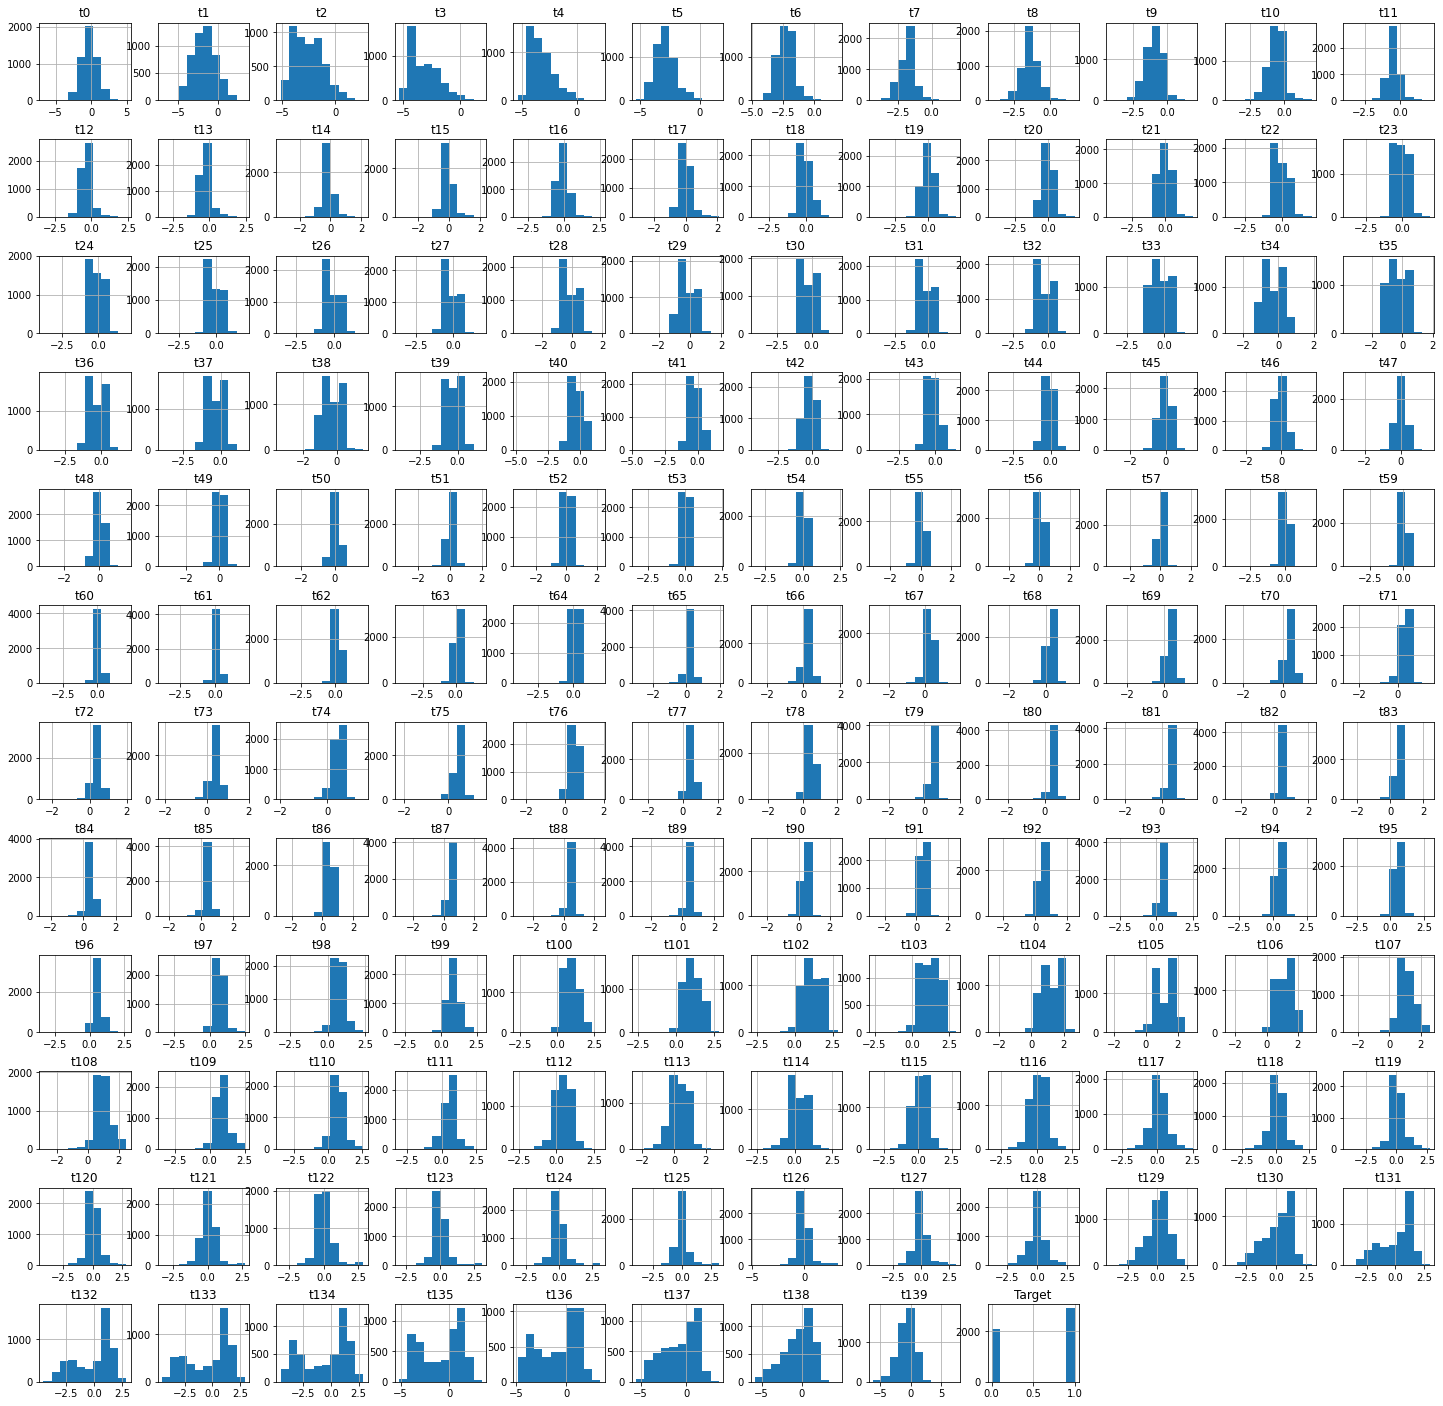

In [84]:
ecg_data.hist(figsize=(25,25))
plt.subplots_adjust(hspace=0.5);

What features do we have possible cause for concern about and why?



## 2.7 Target Feature<a id='2.7_Target_Feature'></a>

Finally, what will your target be when modelling ticket price? What relationship is there between weekday and weekend prices?

Text(0, 0.5, 'Target')

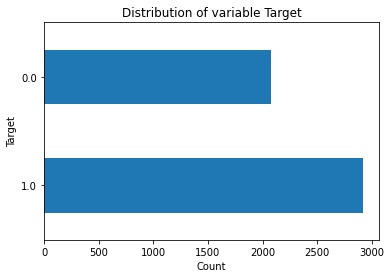

In [91]:
plt.figure()
ecg_data.Target.value_counts().plot(kind='barh')
plt.title('Distribution of variable Target')
plt.xlabel('Count')
plt.ylabel('Target')

In [90]:
ecg_data.Target.value_counts()

1.0    2919
0.0    2079
Name: Target, dtype: int64

This number of normal samples in the dataset is more than abnormal ones.

## 2.8 Save data<a id='2.8_Save_data'></a>

In [86]:
ecg_data.shape

(4998, 141)

Save this to your data directory, separately. Note that you were provided with the data in `raw_data` and you should saving derived data in a separate location. This guards against overwriting our original data.

In [92]:
# save the data to a new csv file
datapath = '../data'
save_file(ecg_data, 'ecg_data_cleaned.csv', datapath)

A file already exists with this name.

Writing file.  "../data\ecg_data_cleaned.csv"
